In [4]:
import pandas as pd
import numpy as np

def load_data(file_path):
    return pd.read_excel(file_path)

def extract_matrices(data):
    matrix1 = data[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    matrix2 = data[['Payment (Rs)']].values
    return matrix1, matrix2

def calculate_dimensionality(matrix):
    return matrix.shape[1]

def calculate_num_vectors(matrix):
    return matrix.shape[0]

def calculate_individual_costs(matrix1, matrix2):
    pseudo_inv = np.linalg.pinv(matrix1)
    return pseudo_inv @ matrix2

if __name__ == "__main__":
    file_path = r"C:\Users\Murari\Downloads\Lab Session1 Data.xlsx"
    df = load_data(file_path)

    matrix1, matrix2 = extract_matrices(df)
    num_rows, num_columns = matrix1.shape

    print("matrix A:",matrix1)
    print("matrix C:",matrix2)
    print("Dimensionality of the vector space:", calculate_dimensionality(matrix1))
    print("The number of vectors that exist in the vector space:", calculate_num_vectors(matrix1))

    rank = np.linalg.matrix_rank(matrix1)
    print("Rank of the matrix:", rank)

    individual_costs = calculate_individual_costs(matrix1, matrix2)

    print("The individual cost of a candy is: ", round(individual_costs[0][0]))
    print("The individual cost of a mango is: ", round(individual_costs[1][0]))
    print("The individual cost of a milk packet is: ", round(individual_costs[2][0]))


matrix A: [[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
matrix C: [[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]
Dimensionality of the vector space: 3
The number of vectors that exist in the vector space: 10
Rank of the matrix: 3
The individual cost of a candy is:  1
The individual cost of a mango is:  55
The individual cost of a milk packet is:  18


In [5]:
import pandas as pd
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((np.array(x1) - np.array(x2))**2))

def k_nearest_neighbors(training_data, labels, query, k):
    distances = [euclidean_distance(query, data) for data in training_data]
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = [labels[i] for i in nearest_indices]
    predicted_label = max(set(nearest_labels), key=nearest_labels.count)
    return predicted_label

def load_data(file_path):
    return pd.read_excel(file_path)

if __name__ == "__main__":
    file_path = r"C:\Users\Murari\Downloads\Lab Session1 Data.xlsx"
    df = load_data(file_path)

    # Mark customers as RICH or POOR
    df['Class'] = np.where(df['Payment (Rs)'] > 200, 'RICH', 'POOR')

    # Prepare features and target
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df['Class'].values

    # Training data and labels
    training_data = X
    labels = y
    # Customer to be classified
    query_customer = [1400, 3, 270]
    # Number of neighbors to consider
    k = 3
    predicted_class = k_nearest_neighbors(training_data, labels, query_customer, k)
    print("Predicted class:", predicted_class)


Predicted class: RICH


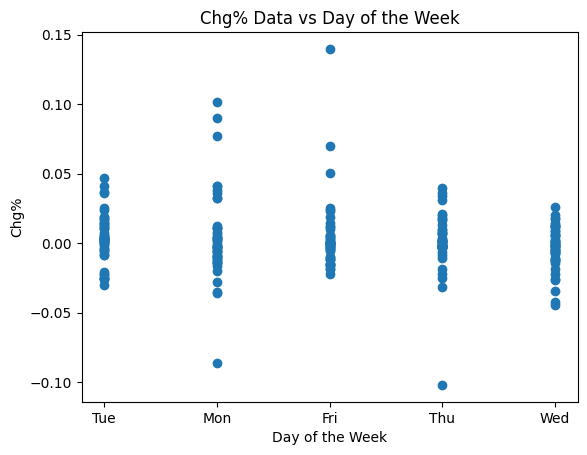

Price Mean: 1560.6634538152612
Price Variance: 58732.36535253918
Wednesday Sample Mean: 1550.7060000000001
April Sample Mean: 1698.9526315789474
Loss Probability: 0.4979919678714859
Wednesday Profit Probability: 0.42
Conditional Probability of Profit Given Wednesday: 0.42


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    return pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

def calculate_price_mean_and_variance(df):
    price_mean = df['Price'].mean()
    price_variance = df['Price'].var()
    return price_mean, price_variance

def calculate_wednesday_sample_mean(df):
    wednesday_prices = df[df['Day'] == 'Wed']['Price']
    if len(wednesday_prices) > 0:
        return wednesday_prices.mean()
    else:
        return None

def calculate_april_sample_mean(df):
    april_prices = df[df['Month'] == 'Apr']['Price']
    if len(april_prices) > 0:
        return april_prices.mean()
    else:
        return None

def calculate_loss_probability(df):
    total_changes = len(df['Chg%'])
    if total_changes > 0:
        loss_changes = len(df[df['Chg%'] < 0])
        return loss_changes / total_changes
    else:
        return None

def calculate_wednesday_profit_probability(df):
    wednesday_changes = len(df[df['Day'] == 'Wed'])
    if wednesday_changes > 0:
        wednesday_profit_changes = len(df[(df['Day'] == 'Wed') & (df['Chg%'] > 0)])
        return wednesday_profit_changes / wednesday_changes
    else:
        return None

def calculate_conditional_probability_profit_given_wednesday(df):
    #identifying the number of wednesday in the sheet
    wednesday_changes = len(df[df['Day'] == 'Wed'])
    if wednesday_changes > 0:
    #calculating the probability that a  Wednesday is profitable
        wednesday_profit_changes = len(df[(df['Day'] == 'Wed') & (df['Chg%'] > 0)])
        return wednesday_profit_changes / wednesday_changes
    else:
        return None

def plot_chg_vs_day(df):
    plt.scatter(df['Day'], df['Chg%'])
    plt.xlabel('Day of the Week')
    plt.ylabel('Chg%')
    plt.title('Chg% Data vs Day of the Week')
    plt.show()

# Example usage
file_path = r"C:\Users\Murari\Downloads\Lab Session1 Data.xlsx"
df = load_data(file_path)

price_mean, price_variance = calculate_price_mean_and_variance(df)
wednesday_sample_mean = calculate_wednesday_sample_mean(df)
april_sample_mean = calculate_april_sample_mean(df)
loss_probability = calculate_loss_probability(df)
wednesday_profit_probability = calculate_wednesday_profit_probability(df)
conditional_probability_profit_given_wednesday = calculate_conditional_probability_profit_given_wednesday(df)
plot_chg_vs_day(df)

print("Price Mean:", price_mean)
print("Price Variance:", price_variance)
print("Wednesday Sample Mean:", wednesday_sample_mean)
print("April Sample Mean:", april_sample_mean)
print("Loss Probability:", loss_probability)
print("Wednesday Profit Probability:", wednesday_profit_probability)
print("Conditional Probability of Profit Given Wednesday:", conditional_probability_profit_given_wednesday)


The mean of april greater than the complete mean
The mean of wednesdays is less than the mean of all the days